In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.7 MB/s 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/bip_result_clustering_and_3_labelling.csv')
df_copy1 = df
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tanggal,User,Tweet,Sentimen
0,0,0,0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin,0
1,1,1,1,2022-08-04 15:32:06,soloposdotcom,ratus nakes kota madiun mulai suntik vaksin bo...,2
2,2,2,2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter tinggal pasca suntik vak...,0
3,3,3,3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kad gegara asn to...,2
4,4,4,4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap kalo m...,0


In [ ]:
text = []
for i in range(0,len(df['Tweet'])):
  Tweet = df['Tweet'][i]
  text.append(Tweet)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tanggal,User,Tweet,Sentimen
0,0,0,0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin,0
1,1,1,1,2022-08-04 15:32:06,soloposdotcom,ratus nakes kota madiun mulai suntik vaksin bo...,2
2,2,2,2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter tinggal pasca suntik vak...,0
3,3,3,3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kad gegara asn to...,2
4,4,4,4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap kalo m...,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df['Tweet'],df['Sentimen'],
                                                   test_size=0.2, stratify=df['Sentimen'], random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [ ]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test).todense()

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.9275

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


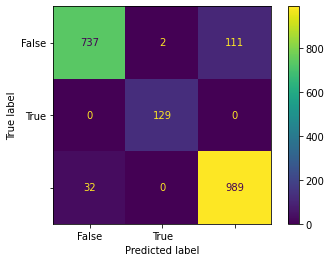

Accuracy of Naive Bayes classifier on test set : 0.93

All Evaluation Result
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       850
           1       0.98      1.00      0.99       129
           2       0.90      0.97      0.93      1021

    accuracy                           0.93      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.93      0.93      0.93      2000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

print("=============================================================================================")
print('Accuracy of Naive Bayes classifier on test set : {:.2f}'.format(model.score(x_test, y_test)))
print("=============================================================================================")
print()
print("=============================================================================================")
print("All Evaluation Result")
print("=============================================================================================")
print(classification_report(y_test, y_pred))


In [ ]:
import pickle

pickle.dump(vectorizer,open('count_vect.pkl', 'wb'))
pickle.dump(model, open('vect.pkl', 'wb'))